In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import math

In [10]:
filename = 'fifa_data.csv'
df = pd.read_csv(filename)
df.head(1)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M


In [11]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.columns.tolist()
numerical_features = numerical_features.drop(columns=['Unnamed: 0','ID', 'Age', 'Overall', 'Potential', 'Special'])

In [12]:
numerical_features.columns

Index(['International Reputation', 'Weak Foot', 'Skill Moves', 'Jersey Number',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [14]:
# featuring some special columns 
# passing score
passing_cols = ['Crossing', 'ShortPassing', 'LongPassing', 'Curve', 'FKAccuracy']
df['passing_score'] = df[passing_cols].mean(axis=1)
#ball control score
ball_control_cols = ['BallControl', 'Dribbling', 'Skill Moves', 'Acceleration', 'Balance']
df['ball_control_score'] = df[ball_control_cols].mean(axis=1)
#stamina score
stamina_cols = ['Stamina', 'Strength', 'Aggression', 'Jumping', 'SprintSpeed', 'Jumping', 'LongShots']
df['stamina_score'] = df[stamina_cols].mean(axis=1)
#gk score
gk_cols = ['GKHandling', 'GKDiving', 'GKKicking', 'GKPositioning', 'GKReflexes']
df['gk_score'] = df[gk_cols].mean(axis=1)
#tackling score
tackling_cols = ['StandingTackle', 'SlidingTackle', 'Interceptions', 'Marking']
df['tackling_score'] = df[tackling_cols].mean(axis=1)

featured_df = df[['passing_score', 'ball_control_score', 'stamina_score', 'gk_score', 'tackling_score']]
featured_df.head(1)

,passing_score,ball_control_score,stamina_score,gk_score,tackling_score
0,89.6,76.6,70.714286,10.8,27.25


In [20]:
# radar chart for first player
player = featured_df.iloc[0]
name = df['Name'].iloc[0]
labels = player.index.tolist()
stats = player.values.tolist()
labels, stats

(['passing_score',
  'ball_control_score',
  'stamina_score',
  'gk_score',
  'tackling_score'],
 [89.6, 76.6, 70.71428571428571, 10.8, 27.25])

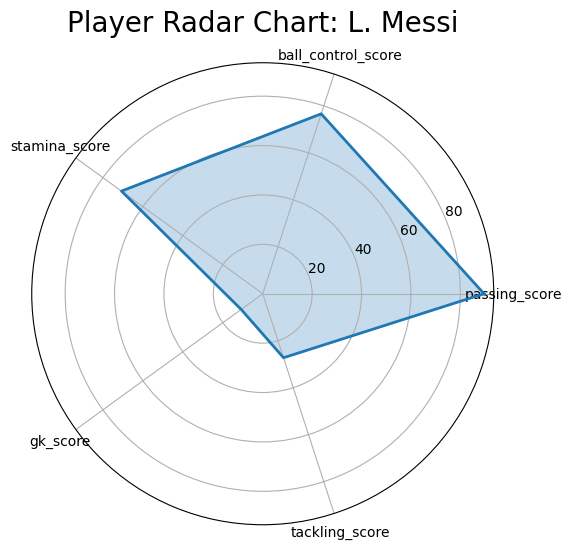

In [21]:
# creating radar chart
num_variables = len(labels)

angles = np.linspace(0, 2*np.pi, num_variables, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
ax.plot(angles, stats+stats[:1], linewidth=2)
ax.fill(angles, stats+stats[:1], alpha=0.25)

ax.set_title(f'Player Radar Chart: {name}', size=20, y=1.05)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)

plt.show()

In [22]:
# function to plot any player radar chart using player index as parameter
def plot_radar(index):
    player = featured_df.iloc[index]
    name = df['Name'].iloc[index]
    labels = player.index.tolist()
    stats = player.values.tolist()

    num_variables = len(labels)
    angles = np.linspace(0, 2*np.pi, num_variables, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, stats+stats[:1], linewidth=2)
    ax.fill(angles, stats+stats[:1], alpha=0.25)
    ax.set_title(f'Player Radar Chart: {name}', size=20, y=1.05)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    plt.show()

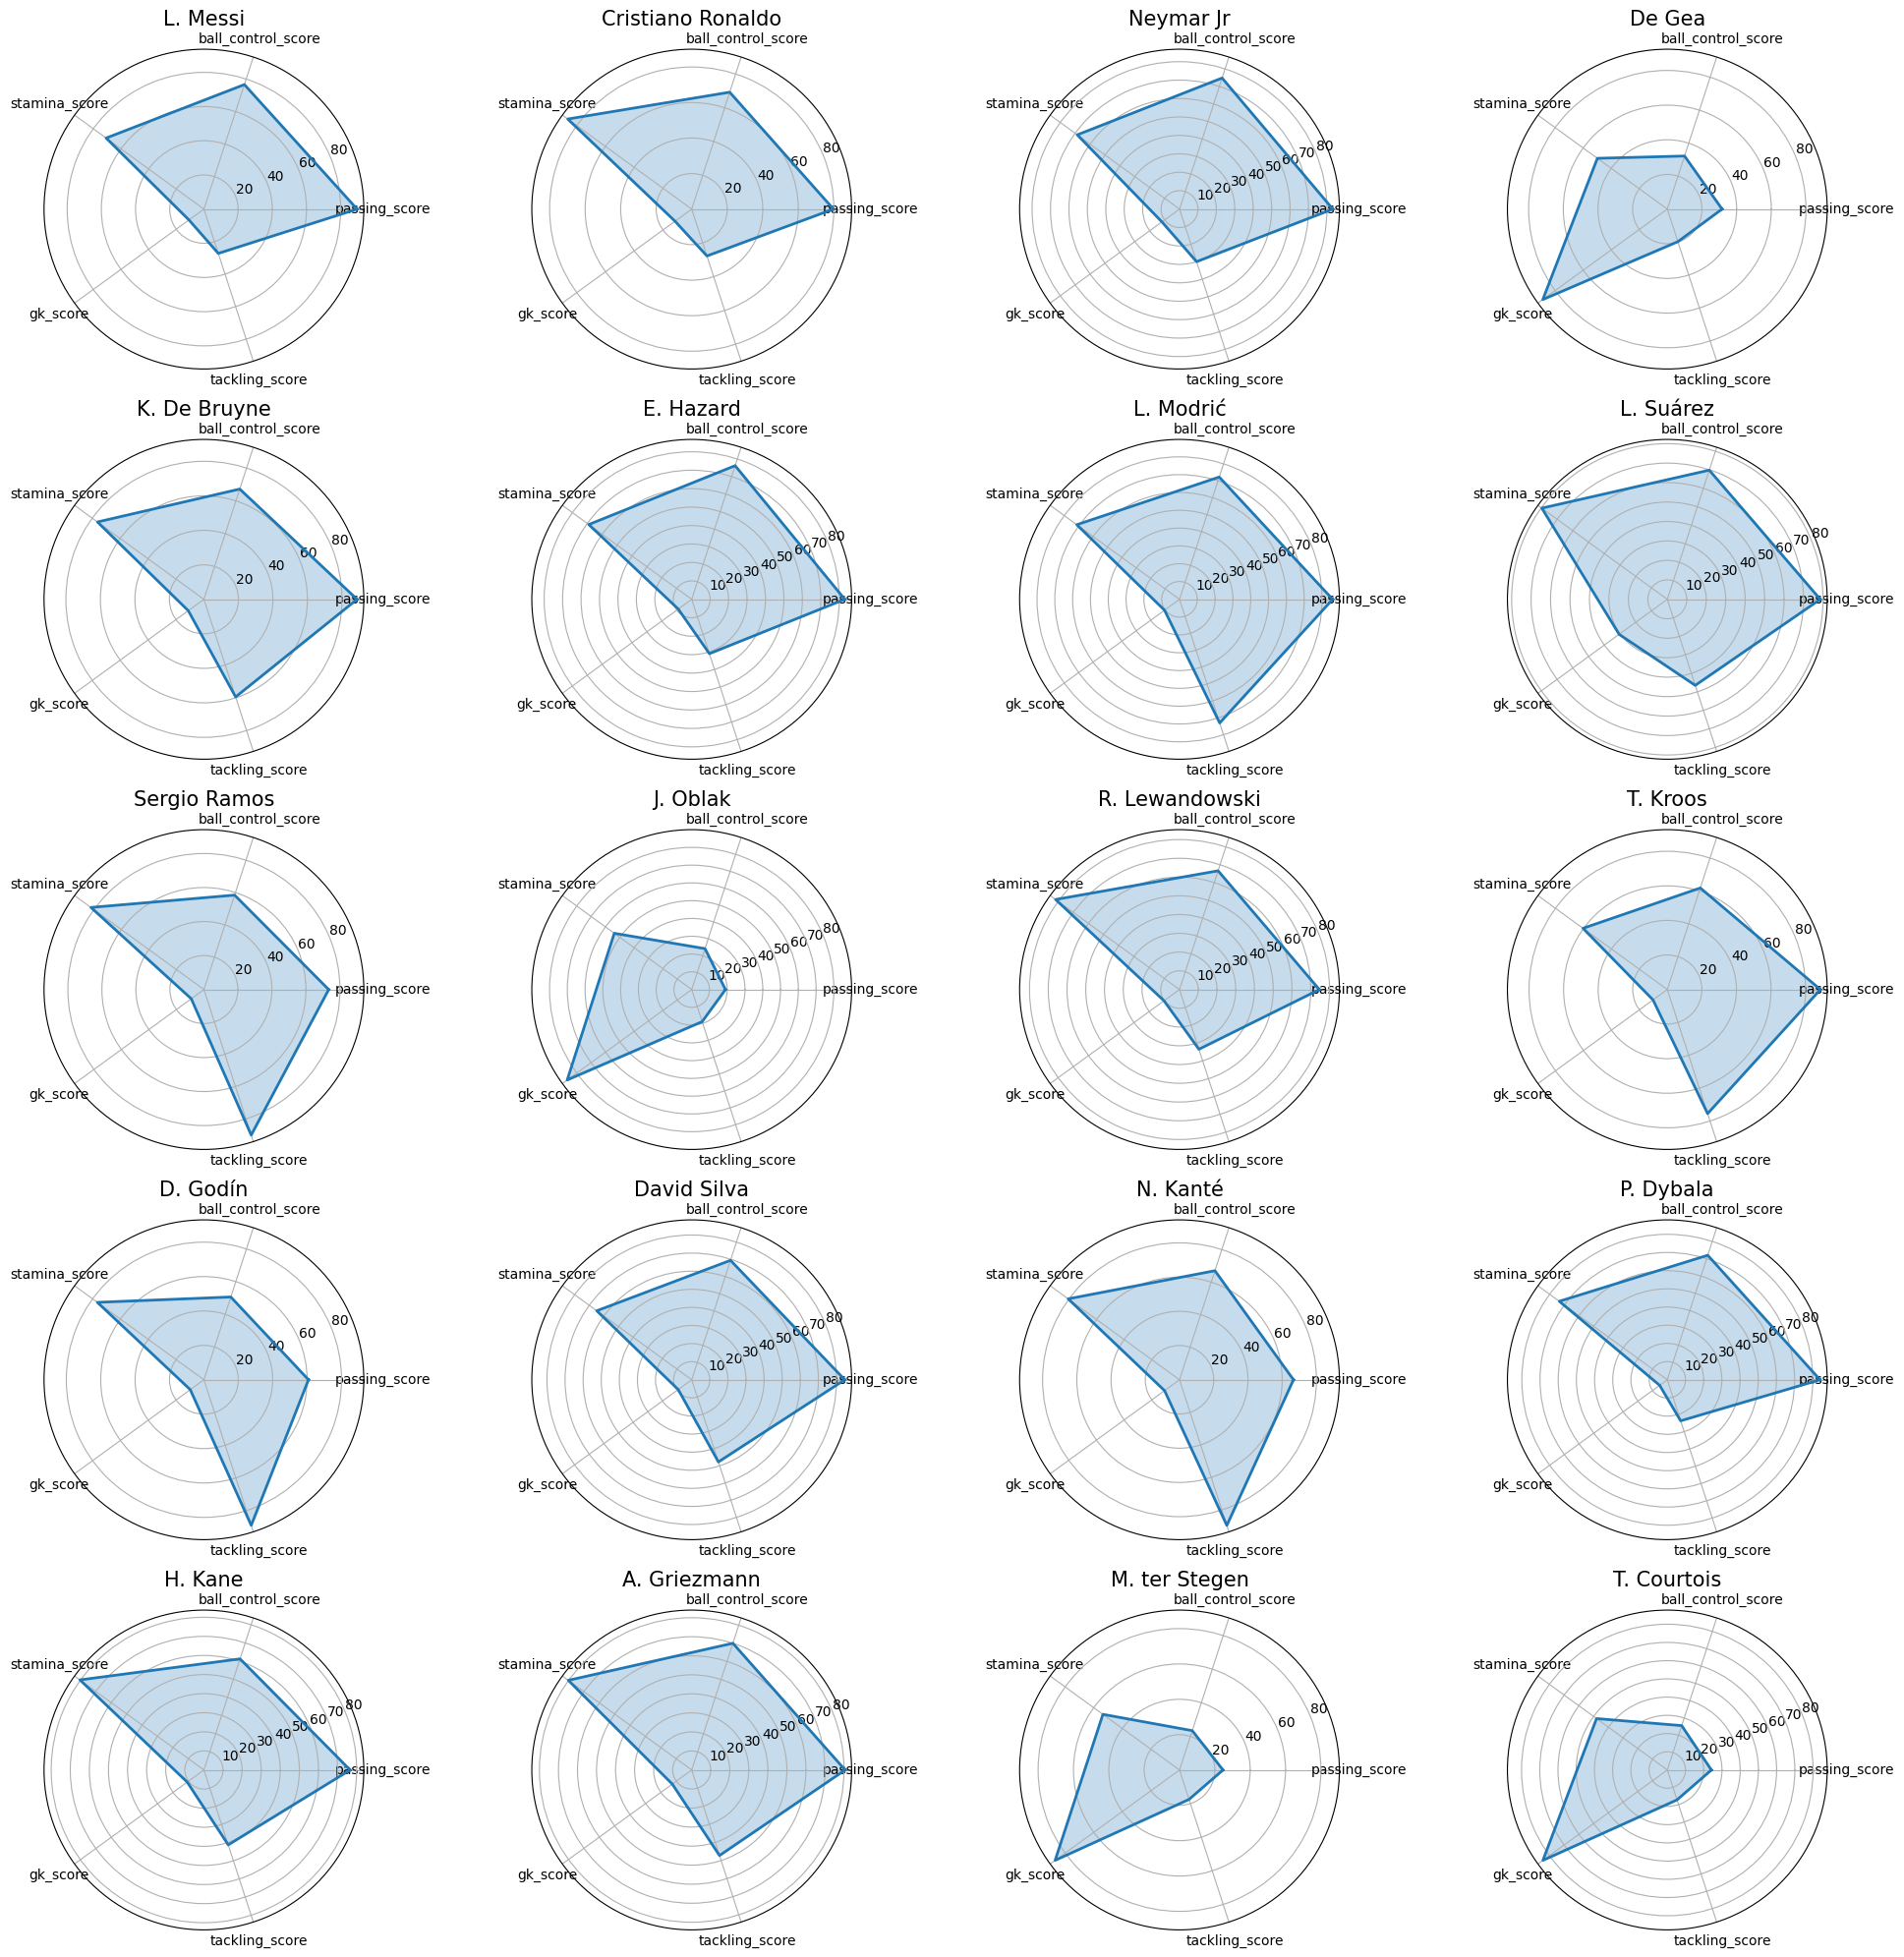

In [24]:
# plotting radar charts from players 1 to 20 row wise and column wise (5 in a column and 4 in a row)
fig, axs = plt.subplots(5, 4, figsize=(20, 20), subplot_kw=dict(polar=True))
for i, ax in enumerate(axs.flat):
    player = featured_df.iloc[i]
    name = df['Name'].iloc[i]
    labels = player.index.tolist()
    stats = player.values.tolist()

    num_variables = len(labels)
    angles = np.linspace(0, 2*np.pi, num_variables, endpoint=False).tolist()
    angles += angles[:1]

    ax.plot(angles, stats+stats[:1], linewidth=2)
    ax.fill(angles, stats+stats[:1], alpha=0.25)
    ax.set_title(f'{name}', size=15, y=1.05)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
plt.tight_layout()
plt.show()

In [26]:
# plotly interactive radar chart 
player = featured_df.iloc[2]
name = df['Name'].iloc[2]
labels = player.index.tolist()
stats = player.values.tolist()

fig = px.line_polar(
    r=stats + stats[:1],
    theta=labels + labels[:1],
    line_close=True,
    title=f'Player Radar Chart: {name}'
)
fig.update_traces(fill='toself')
fig.show()

In [27]:
# comparison between messi and ronaldo
players = featured_df.iloc[[0, 1]]
names = df['Name'].iloc[[0, 1]].tolist()
players

,passing_score,ball_control_score,stamina_score,gk_score,tackling_score
0,89.6,76.6,70.714286,10.8,27.25
1,79.8,69.2,86.285714,11.6,27.75


In [28]:
labels = players.columns.tolist()
stats1 = players.iloc[0].values.tolist()
stats2 = players.iloc[1].values.tolist()
labels = players.columns.tolist()
stats1 = players.iloc[0].values.tolist()
stats2 = players.iloc[1].values.tolist()

In [29]:
players_melted = players.reset_index().melt(id_vars='index', var_name='skill', value_name='value')

In [30]:
fig = px.line_polar(
    players_melted,
    r = "value",
    theta = "skill",
    color = "index",
    line_close=True,
    title=f'Player Radar Chart Comparison: {names[0]} vs {names[1]}'
)
fig.update_traces(fill='toself', opacity=0.4)
fig.show()